# План курса

1. Основные понятия временных рядов.
2. ARMA модели
3. SARMA модели
4. ARCH/GARCH модели
5. Байессовские модели временных рядов
6. VAR
7. Теория коинтеграции


# Временные ряды. Основные понятия. Примеры

Будем говорить, что **временной ряд** это последовательность случайных
величин (одномерных или многомерных) $x_t=(x_{t_1},...,x_{t_n})$,
наблюдаемая в моменты времени $t_1,...,t_n$ [Box,Jenkins].

Другими словами временной ряд $x_t$ -это случайный процесс с дискретным
временем.  Если интервалы времени $t_k-t_{k-1}=const$ для всех $k$, то
индекс $t_k$ заменим просто на порядковый номер. 

Итак, случайный процесс $x_t=(x_1,...,x_n)$ с дискретным временем будем называть временным
рядом. В теории обычно предполагается, что временной ряд имеет
бесконечную длину и динамика его рассматривается от $-\infty$ до
$\infty$.

В этом случае это записывают так: ${x_t:t = 0,\pm1,\pm2,....}$

Временные ряды часто изображают графически, по оси абцисс располагают
время, наблюдаемые значения процесса отображают по оси ординат. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
import statsmodels.api as sm

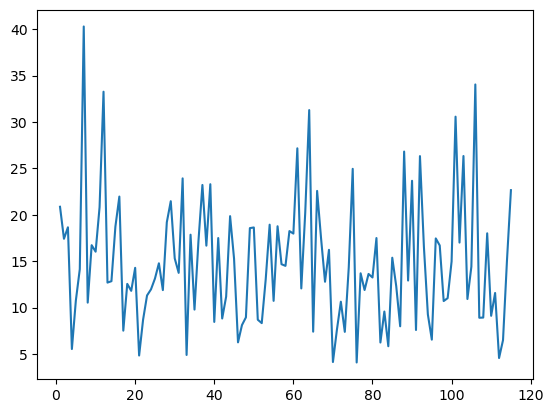

In [15]:
data = pd.read_csv('larain.csv',index_col = 0)
plt.plot(data)
plt.show()

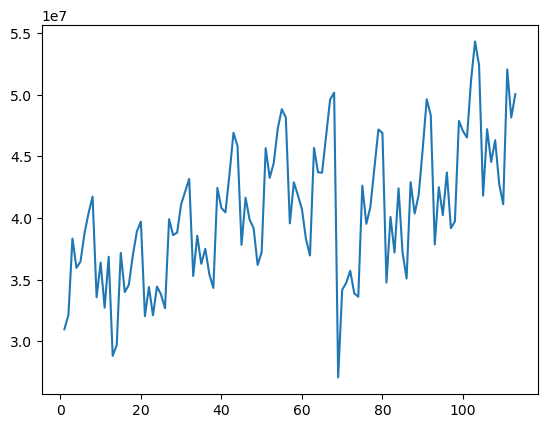

In [16]:
data = pd.read_csv('airmiles.csv',index_col = 0)
data
plt.plot(data)
plt.show()

Последний ряд интересен тем, что на нем хорошо заметны компоненты из
которых состоит ряд. Предполагается, что временной ряд состоит из
следующих компонент

$x_t=m_t+s_t+i_t+u_t+\epsilon_t$

где через $m_t$ обозначают **тренд** - основную тенденцию в динамике
ряда, в рассматриваемом примере основная тенденция -это рост. Через
$s_t$ обозначен **сезонный эффект**, или просто сезонность. Это
некоторый эффект характерный для динамики ряда и повторяющийся,вообще
говоря, с известным периодом. В данном примере период сезонности равен
12 - число месяцев в году. Через $i_t$ будем обозначать интервенции-
резкое изменение в динамике процесса, вызванное часто внешним
воздействием. В примере это известный всем террористический акт 11
сентября 2001 года\
Последнюю компоненту ряда , $u_t+\epsilon_t$, будем называть
**стационарным случайным процессом**. Стогое определение этого понятия
будет дано в курсе позднее. А также станет понятно почему оно состоит из
двух\
частей $u_t$ и $\epsilon_t$. Последняя носит название "белый шум".
Почему шум имеет белый цвет и какого другого цвета бывают шумы также
позднее будет пояснено. Увидеть компоненту $u_t+\epsilon_t$ в ряде пока
трудно, мешают предшествующие. Деление на компоненты
$m_t,s_t,i_t и u_t+\epsilon_t$ весьма условно, в ходе анализа сезонность
или интервенция сами вдруг станут трендом. Модель

$x_t=m_t+s_t+i_t+u_t+\epsilon_t$

называют аддитивной моделью.

Возможно представления ряда в виде произведения соответствующих
компонент

$x_t=m_t*s_t*i_t*(u_t+\epsilon_t)$

В этом случае она носит название мультипликативной модели, которая
сводится к аддитивной путем формального логарифмирования.


## Простейшие описательные статистики

Для случайного процесса временого ряда ${x_t:t = 0,\pm1,\pm2,....}$
определим математическое ожидание.

$E[x_t]=\mu_t,t=0,\pm1,\pm2,...$

В общем случае $\mu_t$ различно для каждого $t = 0,\pm1,\pm2,....$

Дисперсия ряда

$D[x_t]=E(x_t-\mu_t)^2= \sigma_t^2 ,t=0,\pm1,\pm2,...$

Очень важную роль будет играть **автоковариационная функция**
$c(x_t,x_s)$ и **автокорреляционная функция** $\gamma(x_t,x_s)$
Определяются они следующим образом соответсвенно

$c(x_t,x_s) =cov(x_t,x_s)=E(x_t-\mu_t)(x_s-\mu_s):s,t=0,\pm1,\pm2,...$

и

$\gamma(x_t,x_s) =\frac{c(x_t,x_s)}{\sqrt{ D[x_t]}\sqrt {D[x_s]}}:s,t=0,\pm1,\pm2,...$

По выборке исторических данных $x_1,...,x_n$ оценка среднего, дисперсии
и автоковариационной функции осуществляется по формулам:

математическое ожидание

$E[x_t]\approx\overline{x}= \frac{1}{n}\sum_{t=1}^nx_t$

дисперсия

$D[x_t]\approx \frac{1}{n-1}\sum_{t=1}^n(x_t- \overline x)^2$

автоковариационная функция стационарного временного ряда зависит от
разности времен $s,t$

$c(s,t)=c(k=|t-s|)\approx \frac{1}{n-k}\sum_{t=1}^{n-k}(x_t- \overline x)(x_{t+k}- \overline x)$

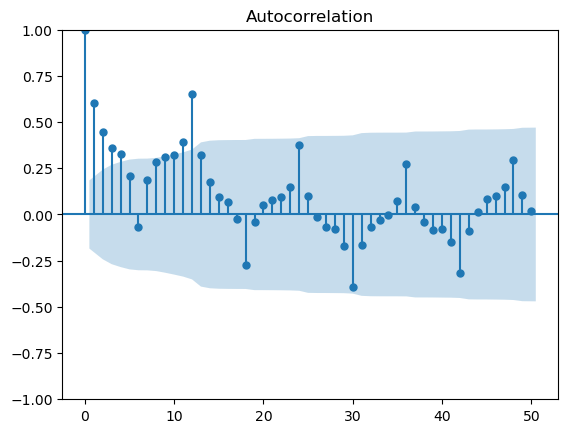

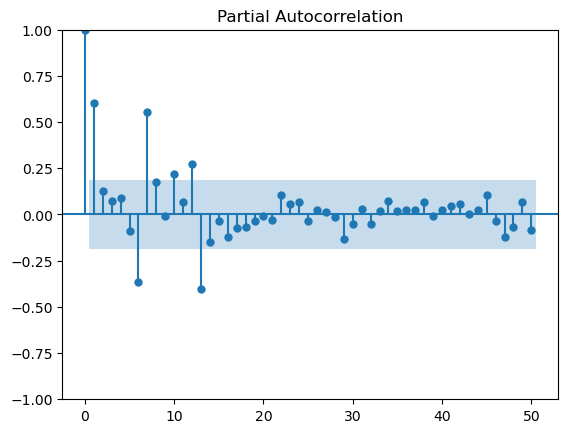

In [20]:
data = pd.read_csv('airmiles.csv',index_col = 0)
sm.graphics.tsa.plot_acf(data, lags=50)
plt.show()
sm.graphics.tsa.plot_pacf(data, lags=50)
plt.show()

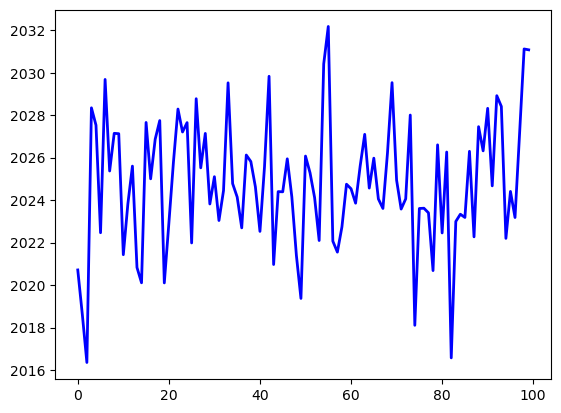

2024.8006930436788
3.059869466892605


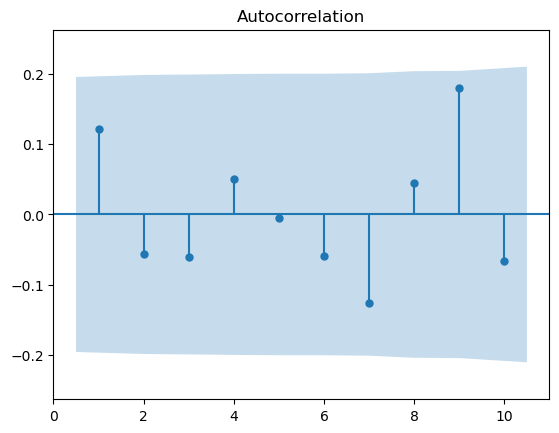

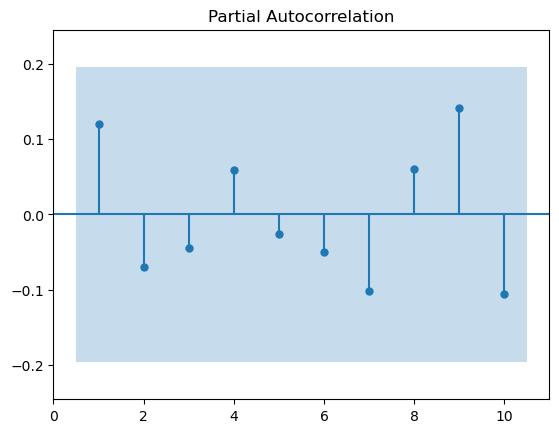

In [21]:
mu = 2025
sigma = 3
data  = np.random.normal(mu,sigma, size = 100)
plt.plot(data,color = "blue", lw = 2)
plt.show()
print(data.mean())
print(data.std())
sm.graphics.tsa.plot_acf(data, lags=10, use_vlines = True, adjusted = True, zero=False, auto_ylims = True)
plt.show()
sm.graphics.tsa.plot_pacf(data, lags=10, use_vlines = True, zero=False, auto_ylims = True)
plt.show()

Пусть $\epsilon_1,...,\epsilon_n$ последовательность независимых
нормально распределенных случйаных величин, или так называемый
нормальный **белый шум** с математическим ожиданием $E[\epsilon_t]=0$ и
дисперсией $D[\epsilon_t]=\sigma_{\epsilon}^2:t=1,..n$

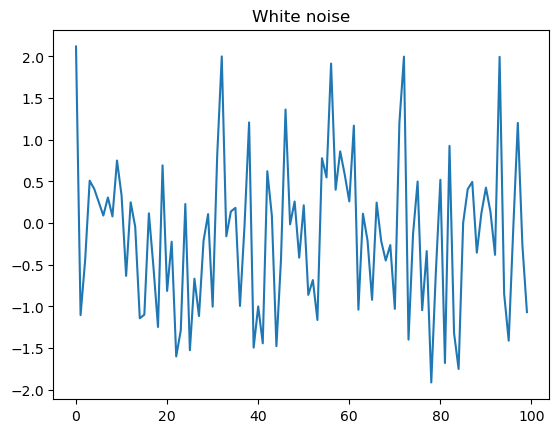

In [22]:
sigma = 1
white_noise  = np.random.normal(0,sigma, size = 100)
plt.plot(white_noise)
plt.title('White noise')
plt.show()

Построим процесс $x_t$ следующим образом

$x_1=\epsilon_1$

$x_2=x_1+\epsilon_2$

$....$

$x_n=x_{n-1}+\epsilon_n$

Процесс $x_t$ называется **случайным блужданием**.
Нетрудно убедиться, что

$E[x_t]=E[x_{t-1}+\epsilon_t]=E[\epsilon_1+...+\epsilon_t]= 0$,

а

$D[x_t]=D[x_{t-1}+\epsilon_t]=D[\epsilon_1+...+\epsilon_t]=t\sigma_{\epsilon}^2$.

Пусть $1\le t\le s$ .Автокорреляционная функция, так как
$E[\epsilon_t=0]$

$c(x_t,x_s)=E[(\epsilon_1+...\epsilon_t)(\epsilon_1+...\epsilon_s)]=$
$\sum_{i=1}^t\sum_{j=1}^sE[\epsilon_i\epsilon_j]$

Так как $E[\epsilon_i\epsilon_j]=\sigma_\epsilon^2$ при $i=j$ и равно 0
при $i\ne j$ тогда

$c(x_t,x_s)=t\sigma_\epsilon^2$

Более того легко видеть,что при $1\le t\le s$

$c(x_t,x_s)=c(x_s,x_t) = t\sigma_\epsilon^2$

Аналогично легко может быть вычислена и автокорреляционная функция для
процесса $x_t$ случайного блуждания

$\rho(x_t,x_s)=\frac{c(x_t,x_s)}{\sqrt{D[x_t]D[x_s]}}=\sqrt{\frac{t}{s}}$

Случайное блуждание на рисунке выглядит следующим образом

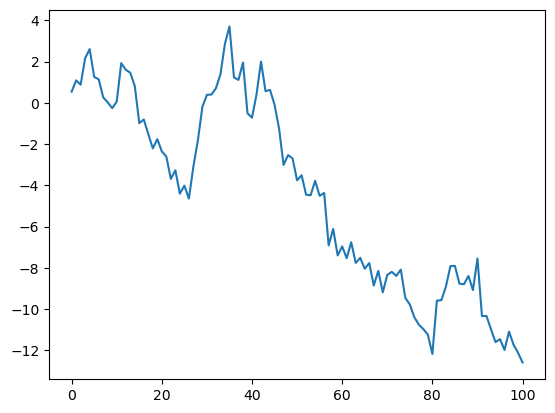

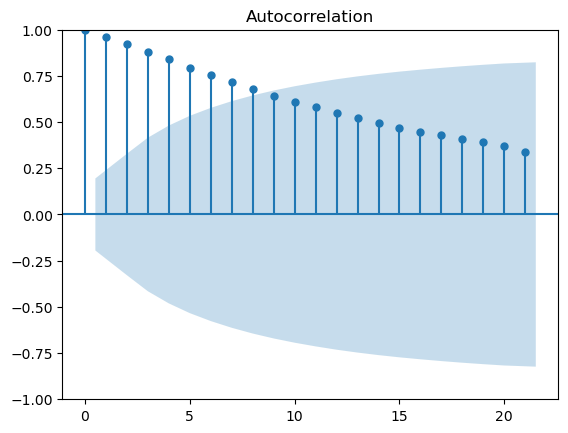

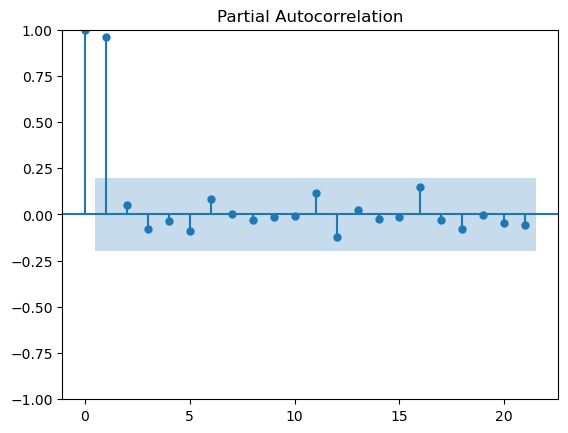

In [51]:
eps  = np.random.normal(0,sigma, size = 100)
x= [eps[0]]
for i in range(len(eps)):
    x.append(x[len(x)-1] + eps[i])
x = np.array(x)
plt.plot(x)
sm.graphics.tsa.plot_acf(x)
sm.graphics.tsa.plot_pacf(x)
plt.show()

## Скользящее среднее

Пусть $\epsilon_1,...,\epsilon_n$ по-прежнему процесс **белого шума**
Построим процессс $x_t:t=1,...,n$ по следующему правилу

$x_t(2)=\frac{\epsilon_t+\epsilon_{t-1}}{2}$

Простейшие вычисления нам дают, что при всех $t=1,...n$
$\mu_t=E[x_t]= E[\frac{\epsilon_t+\epsilon_{t-1}}{2}]= 0$

a

$\sigma_{x,t}^2=D[x_t]= D[\frac{\epsilon_t+\epsilon_{t-1}}{2}]=\frac{D[\epsilon_t]+D[\epsilon_{t-1}]}{4}]=  0.5 \sigma_{\epsilon}^2$

Также нетрудно убедиться,что

$cov(x_t,x_{t-1})= 0.25 \sigma_{\epsilon}^2$

а

$cov(x_t,x_{t-2})= 0$

Объединяя последние 3 выражения, получим, что автоковариационная функция
процесса $x_t$ равна

$с(x_t,x_s)=0.5\sigma_{\epsilon}^2$ при $|t-s|= 0$

$с(x_t,x_s)=0.25\sigma_{\epsilon}^2$ при $|t-s|=1$

$с(x_t,x_s)= 0$ при $|t-s|>1$

для автокорреляционной функции процесса $x_t$

$\rho(x_t,x_s)=1$ при $|t-s|= 0$

$\rho(x_t,x_s)=0.5$ при $|t-s|=1$

$\rho(x_t,x_s)= 0$ при $|t-s|>1$

Аналогично можно ввести скользящее среднее для трех,четырех и любого
произвольного числа $m$ слагаемых

$x_t(m)=\frac{\epsilon_t+\epsilon_{t-1}+...+\epsilon_{t-m}}{m}$

Вычислить математическое ожидание, дисперсию, автоковариационную и
автокорреляционную функции процесса $x_t(m)$ Для любого $m = 2,3,4,...$

$\mu_t=E[x_t]= E[\frac{\sum_{i=0}^{m-1}\epsilon_{t-i}}{m}]= 0$

$\sigma_t^2=D[x_t]= D[\frac{\sum_{i=0}^{m-1}\epsilon_{t-i}}{m}]=\frac{\sum_{i=0}^{m-1}D[\epsilon_{t-i}]}{m^2}=\frac{m\sigma_{\epsilon}^2}{m^2}=\frac{\sigma_{\epsilon}^2}{m}$

Автокоррелляционная функция

$\rho(x_t,x_s)=1$ при $|t-s|= 0$

$\rho(x_t,x_s)\ne0$ при $|t-s|<m$

$\rho(x_t,x_s)= 0$ при $|t-s|\ge m$

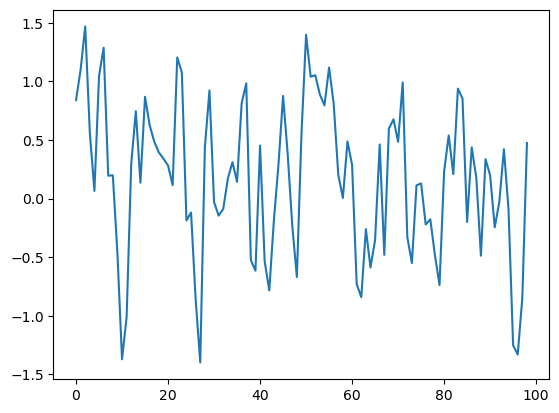

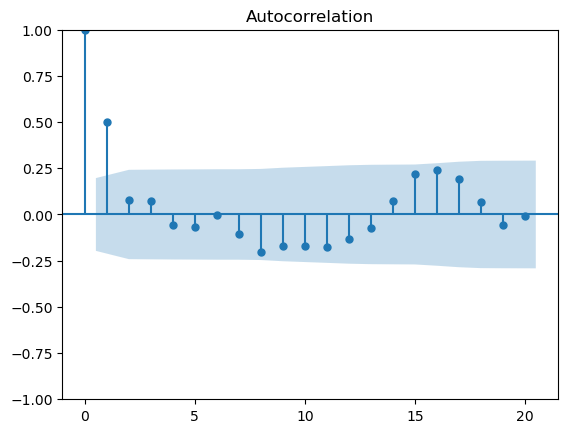

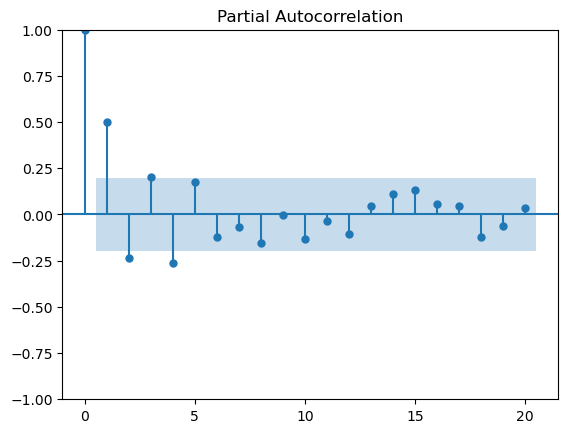

In [25]:
eps  = np.random.normal(0,sigma, size = 100)
x = [0.5*(eps[i]+eps[i-1]) for i in range(1,len(eps))]
x = np.array(x)
plt.plot(x)
sm.graphics.tsa.plot_acf(x)
sm.graphics.tsa.plot_pacf(x)
plt.show()

## Непараметрическая оценка тренда методом скользящего среднего

Пусть дан временной ряд $x_0,...,x_{N}$. Выбираем число $m<<N$, пусть
также некоторым способом определены веса, $w_1,...w_{2m+1}$,тогда в
качестве оценки тренда $m_t$ в точке $t$ можно выбрать взвешенную сумму
$m$ предшествующих моменту $t$ значений ряда, само значение в момент
времени $t$ и $m$ последующих значений ряда.


$m_{t}=\sum_{i=-m}^{m}w_{i}x_{t+i}$ Для избежания смещения в тренде
сумму весов $w_1,...w_{2m+1}$ естественно полагать равной единице.

Например. Пусть $w_1=...=w_{2m+1}=1/(2m+1)$. Оценку тренда получаемую
при данном выборе весовых коэффициентов называют простым скользящим
среднем. В приложениях этот метод часто обозначают SMA(m) (Simple Moving
Average)

## Экспоненциальное скользящее среднее

На практике часто метод скользящих средних применяют для оценки тренда
не для средней точки. А для последней точки ряда. При этом естественно
визуально будет видно некоторое отставание тренда от поведения ряда. Для
нивелирования данного эффекта весовые коэффициенты выбирают так, чтобы
последним наблюдениям предавался больший вес, чем те, которые по времени
были раньше. Примером такого приема является Экспоненциальное скользящее
среднее (EMA).

Пусть ряд весов пропорциональны порядку множителя $b<1$ и

$\sum_{j=0}^{\infty}b^{j}=1/(1-b)$ 

Тогда в качестве весов берутся
числа $1-b,(1-b)b,(1-b)b^2,(1-b)b^3,...$ Предположим, что моделью нашего
ряда является некоторая число $a_0(t)$ и случайный остаток
$\epsilon_{t}$. В момент $t$ строим предиктор

$a_0(t)=(1-b)[x_{t}+bx_{t-1}+b²x_{t-2}+....]=(1-b)\sum_{j=0}^{}b^{j}x_{t-j}$

Заменив $t$ на $t-1$ получим

$a_0(t-1)=(1-b)[x_{t-1}+bx_{t-2}+b^2x_{t-3}+....]$ 

Отсюда
$a_0(t)=(1-b)x_{t}+a_0(t-1)$ Пусть $\epsilon_{t}$ 
ошибка при прогнозе
на один шаг вперед $\epsilon_{t}=x_{t}-a_0(t-1)$ 

Подставляя в формулу
(1) получим $a_0(t)=x_{t}-be_{t}=a_0(t-1)+(1-b)e_{t}$

Таким образом прогноз в момент времени $t$ есть прогноз, сделанный в
момент времени $t-1$ плюс последняя ошибка умноженная на $1-b$
Изложенный метод является простейшим случаем адаптивного
прогнозирования. Выбор $b$ осуществляется минимизированием суммы
квадратов ошибок

$\sum_{t=-\infty}^{t_0}(x_{t}-(1-b)\sum_{j=1}^{∞}b^{j}x_{t-j})^2$

Аналогично можно предположить, что моделью ряда является полином первой
степени $a_{0}+a_1t$ плюс ошибка.

Приводя аналогичные рассуждения, получим, что

$a_0(t)  = a_0(t-1)+a_1(t-1)+(1-b²)e_{t}$

$a_1(t)  = a_1(t-1)+(1-b²)e_{t}$ 

Что дает нам прогноз на один шаг в
виде

$a_0(t)+a_1(t)=a_0(t-1)+2a_1(t-1)-2b(1-b)e_{t}$ Расммотренную
процедуру для произвольной степени предиктора разработал Brown.
Численный пример прогнозирования по методу Брауна будет рассмотрен в
Лекции 6.


## Непараметрическая оценка сезонной компоненты

Метод скользящего среднего можно использовать для непараметрической
оценки сезонного эффекта.Предположим сначала, что сезонный эффект входит
в модель аддитивно

$x_{t}=m_{t}+s_{t}+\epsilon_{t}$

 Для того, чтоба оценить сезонный
эффект $s_{t}$ cначала надо оценить тренд. Рассмотрим на примере
помесячных данных с годовым сезонным эффектом. 
Сначала оценим тренд с
помощью простого скользящего среднего
$m_t = \sum_{i=-q}^q w_i*x_{t+i}$\

с весами $w_i$. $w_{-6},...,w_{6}=(1/(24))[1,2,2,.....2,1]$

Обратите внимание, что число точек здесь 13 c января по январь
следующего года включительно. Получим ряд остатков $u_{t}=x_{t}-m_{t}$
Тогда в качестве оценки сезонной составляющей можно взять набор чисел
$s'_1,,,s'_{12}$ вычисленных по следующему правилу

$s'_1 = \sum_{k=0}^{[N/12]}u_{12k+1}/[N/12]$ $...$

$s'_r = \sum_{k=0}^{[N/12]}u_{12k+r}/([N/12]$ где $r=12$.

Естественно предположить, что суммарный годовой сезонный эффект равен
нулю, $\sum_{k=1}^{12} s_{k}=0$ Поэтому окончательно в качестве
сезонного эффекта берется оценка

$s_{k}=s'_{k}-(\sum_{k=1}^{12}s'_{k}′)/12$

Случай мультипликативной модели сезонного эффекта сводится к аддитивному
путем формального логарифмирования.

$ln(x_{t})=ln(m_{t})+ln(s_{t})+\epsilon_t$ 
Посмотрим оценку сезонного
эффект на примере временного ряда Импорта России, взятого здесь
<https://www.finam.ru/analysis/macroevent/?str=1&ind=670&timestep=2&dind=0>.


In [30]:

fit1 = ExponentialSmoothing(
    data,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    data,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    data,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    data,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

results

,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,5.776952e-01,6.079567e-01,5.787029e-01,0.514352
$\beta$,3.126315e-12,5.559843e-13,1.105270e-13,0.145357
$\phi$,NaN,NaN,9.950000e-01,0.800000
$\gamma$,4.208753e-01,4.205464e-13,4.210446e-01,0.000000
$l_0$,2.781188e+00,1.736827e+00,2.765237e+00,2.400252
$b_0$,2.189818e-02,1.269361e-02,3.529965e-02,0.005824
SSE,7.870805e+02,7.028025e+02,7.857311e+02,698.878251


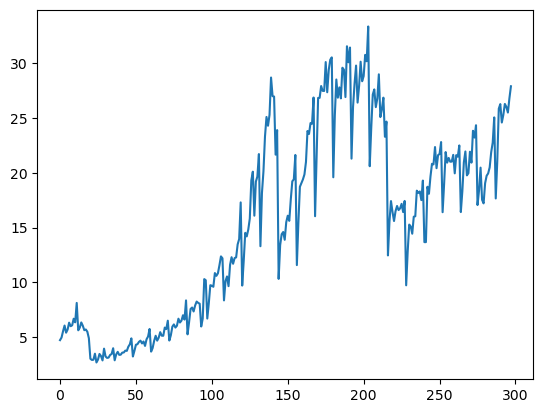

In [27]:
data = pd.read_csv('Import.csv', header=0)
data 
plt.plot(data['Fact'])
plt.show()

In [ ]:
data

In [29]:
data = np.array(data['Fact'])

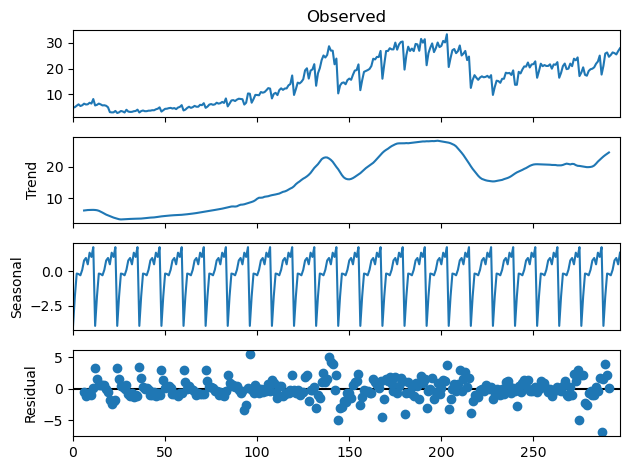

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive', period=12)
result.plot()
plt.show()

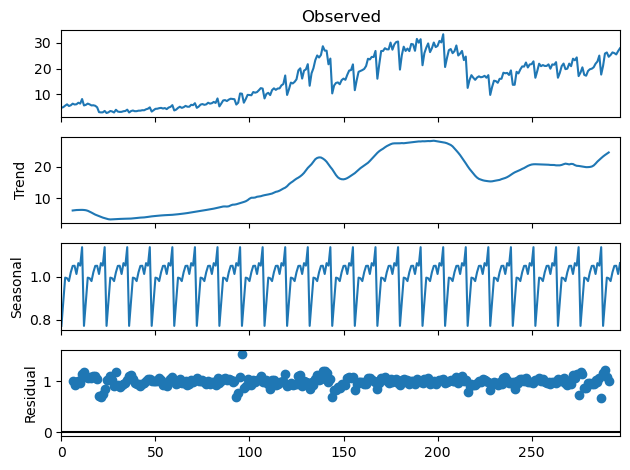

In [39]:
result = seasonal_decompose(data, model='multiplicative', period=12)
result.plot()
plt.show()

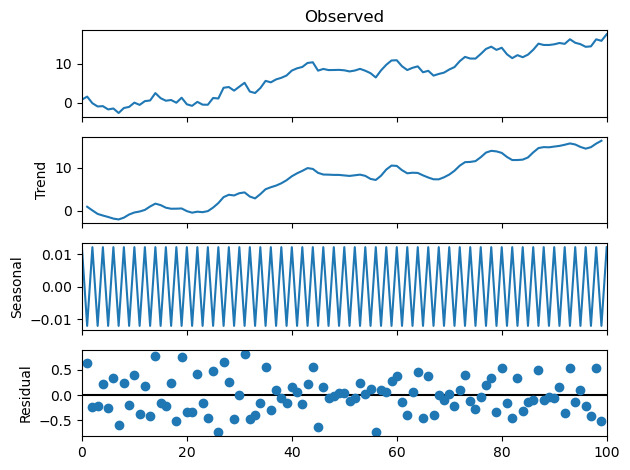

In [44]:
eps  = np.random.normal(0,sigma, size = 100)
x= [eps[0]]
for i in range(len(eps)):
    x.append(x[len(x)-1] + eps[i])
x = np.array(x)
result = seasonal_decompose(x, model='additive', period=2)
result.plot()
plt.show()

Обратите внимание на то,если стоит задача как можно лучше удалить сезонность в остаках, то мультипликативная модель в данном случае предпочтительней.

# Стационарность

Важной характеристикой временного ряда является свойство стационарности

**Определение 1.** Cтрогая стационарность.

Случайный процесс c дискретным временем $x_t:t =0,\pm1,\pm2,...$ называется строго стационарным, если для любого целого $k>0$ для любых моментов времени $t_1,....,t_k$ для любого действительного $s$ распределение процесса в моменты времени $t_1,....,t_k$ и $t_1+s,....,t_k+s$ остается неизменным. Формально запишем это как

$f(x_{t_1},....,x_{t_k}) = f(x_{t_1+s},....,x_{t_k+s})$

Для $k=1$ из строгой стационарности процесса $x_t$ следует, что

$E[x_t]=\mu=const,t=0,\pm1,\pm2,...$

Дисперсия также постоянна во времени

$D[x_t]=E(x_t-\mu_t)^2= \sigma^2=const ,t=0,\pm1,\pm2,...$

При $k=2$ из строгой стационарности процесса $x_t$ следует, что автоковариационная функция и автокорреляционная функция для любых $t\le s$ зависят только от сдвига $|s-t|$

$c(x_t,x_s)=c_{|s-t|}$

$\gamma(x_t,x_s)=\gamma_{|s-t|}$

**Определение 2.** Стационарность в широком смысле.

Случайный процесс c дискретным временем $x_t:t =0,\pm1,\pm2,...$ называется стационарным в широком смысле , если математическое ожидание и дисперсия процесса постоянны 
во времени 

$E[x_t]=\mu=const,t=0,\pm1,\pm2,...$

$D[x_t]=E(x_t-\mu_t)^2= \sigma^2=const ,t=0,\pm1,\pm2,...$

Рассмотренные выше примеры процессов белого шума и скользящего среднего для белого шума это примеры строго стационарных процессов

## Критерии стационарности. Тест Дики-Фуллера

**Тест Дики — Фуллера** — это методика, которая используется при анализе временных рядов для проверки на стационарность. Является одним из тестов на единичные корни (Unit root test). Причем здесь единичные корни выяснится позднее через несколько лекций (см.лекцию Теория коинтеграции). Пока без особых комментариев просто дадим такое определение.

**Определение** Временной ряд $y_t$ имеет единичный корень, или порядок интеграции один, если его первые разности $\Delta y_t = y_t-y_{t-1}$ образуют стационарный ряд.

Тест предложен в 1979 году Дэвидом Дики (англ.) и Уэйном Фуллером (англ.).

В нем проверяется гипотеза о том,что значение коэффициента $\alpha$ в уравнении первого порядка для временного ряда $y_t$ при шуме $\epsilon_t$ $$y_t=\alpha y_{t-1}+\epsilon_t$$ равно единице.

Если гипотеза не отвергается, то говорят , что временной ряд $y_t$ имеет единичный корень, и следовательно он не является стационарным.

Посмотрим как работает тест на некоторых примерах временных рядов из этой лекции.



### Тест Дики-Фуллера для ряда белого шума

Напомним, что в этом случае временной ряд есть просто $y_t=\epsilon_t$ и выглядит на графике так

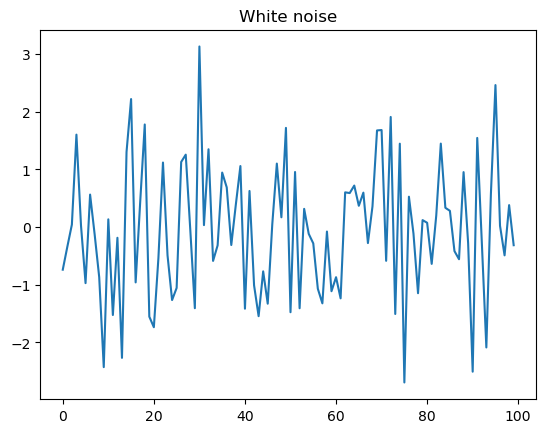

In [45]:
sigma = 1
white_noise  = np.random.normal(0,sigma, size = 100)
plt.plot(white_noise)
plt.title('White noise')
plt.show()

In [49]:
eps  = np.random.normal(0,sigma, size = 100)
x= [eps[0]]
for i in range(len(eps)):
    x.append(x[len(x)-1] + eps[i])
x = np.array(x)
adf_test(x)

Results of Dickey-Fuller Test:
Test Statistic                 -1.805037
p-value                         0.377964
#Lags Used                      1.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


In [46]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = sm.tsa.stattools.adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = sm.tsa.stattools.kpss(timeseries, nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [47]:
adf_test(white_noise)

Results of Dickey-Fuller Test:
Test Statistic                -1.106111e+01
p-value                        4.807084e-20
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


In [50]:
kpss_test(white_noise)

Results of KPSS Test:
Test Statistic           0.074481
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/var/folders/j5/bxln7n_n1lqddqxgf6pc4vpc0000gn/T/ipykernel_15913/612326001.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = sm.tsa.stattools.kpss(timeseries, nlags="auto")
